<a href="https://colab.research.google.com/github/SVaishnaviVasa/IIITH-AIML-Vaishnavi/blob/main/Copy_of_AIML_Module_1_Lab_1_Extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 1
# Extracting features from data





In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=e8a3c02ba74e482036f0edeb7d6deaec8f5356471c96932d91dc3f653d12c951
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [2]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [3]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [4]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [5]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [6]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [7]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

# **HOMEWORK (ADDITIONAL)**
Ans. There is not much significant difference in both the graphs. As humans we know that english and french have different letters (even though very few of them might be used in both but majority its different) but that is not evident from graph.

Based on these graphs if we consider the model to work this way then it might be problematic and give inaccurate predictions.**bold text**

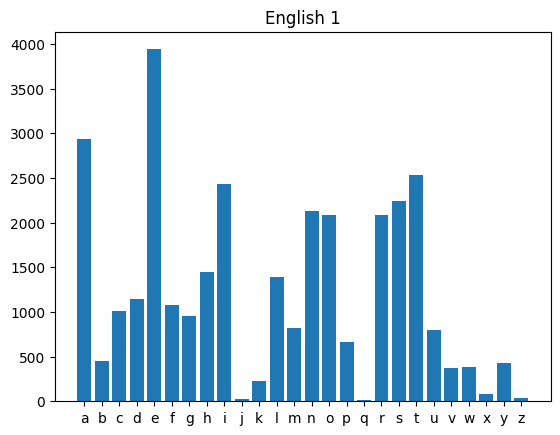

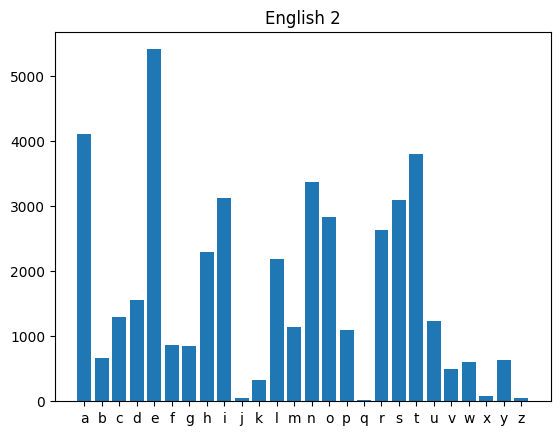

In [9]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

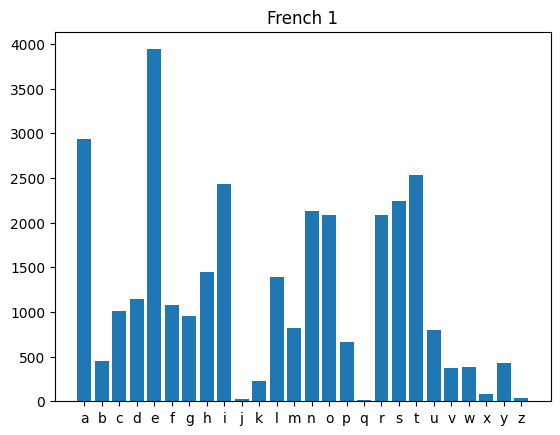

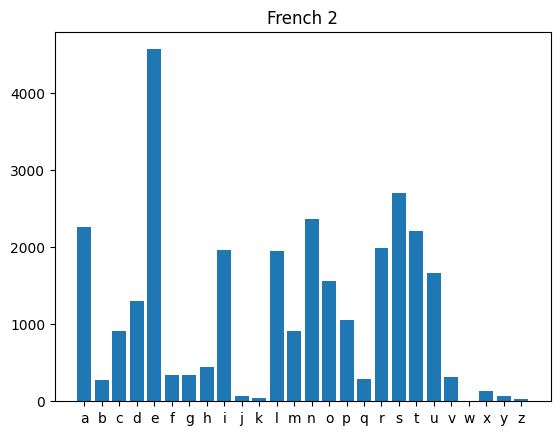

In [10]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

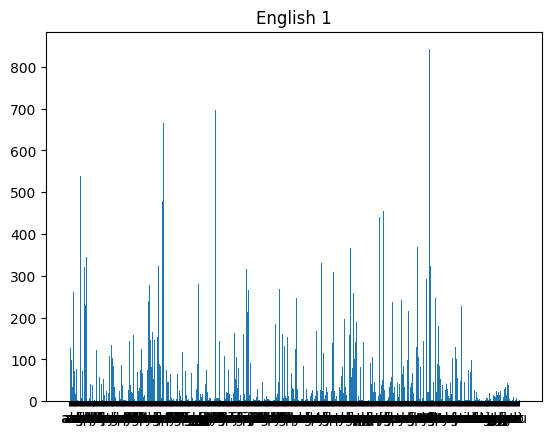

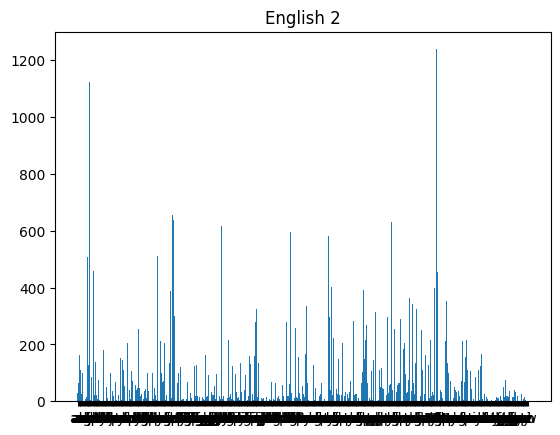

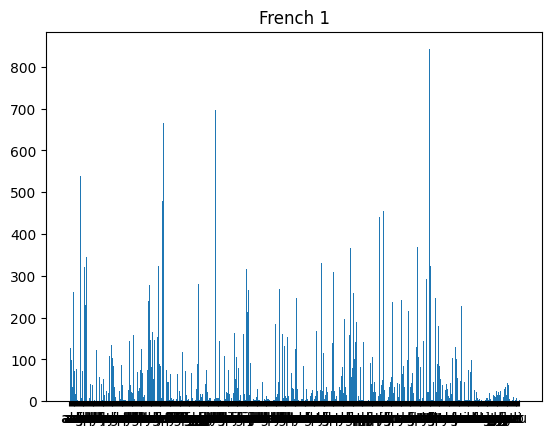

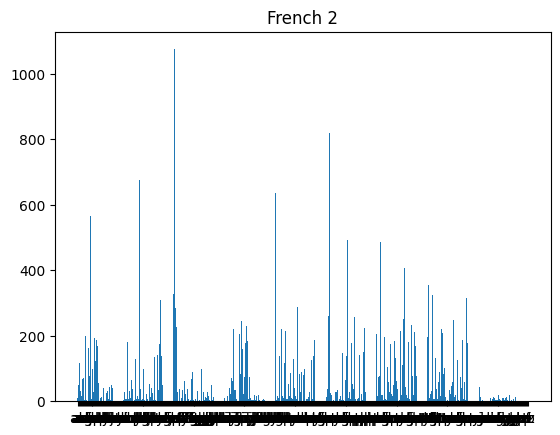

In [11]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [12]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

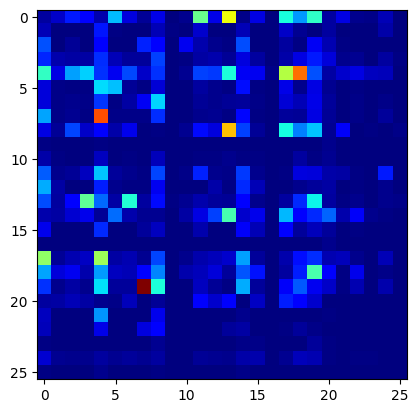

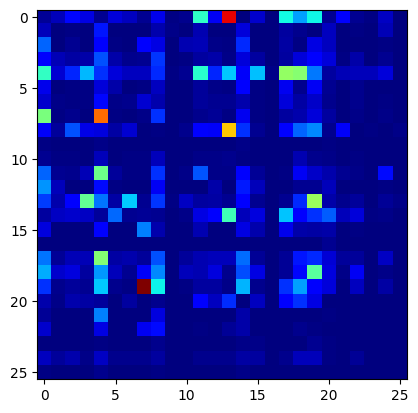

In [13]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

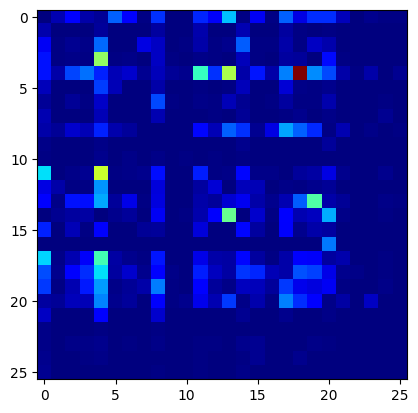

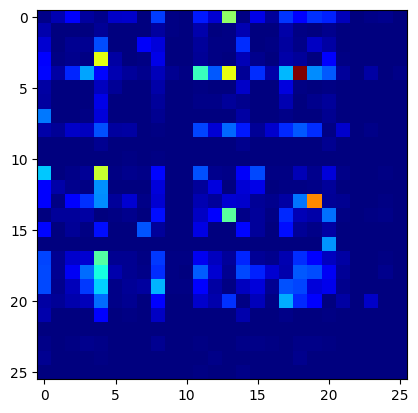

In [14]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [15]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [16]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1238.0
('a', 'n') : 1123.0
('h', 'e') : 983.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 655.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French 1:
('e', 's') : 737.0
('l', 'e') : 438.0
('e', 'n') : 409.0
('d', 'e') : 390.0
('o', 'n') : 349.0
('n', 't') : 329.0
('r', 'e') : 317.0
('e', 'l') : 308.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# **HOMEWORK**

In [34]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

import requests
from bs4 import BeautifulSoup

# Specify the URL of the news article page
url = 'https://www.bbc.com/news'
# Send an HTTP GET request to the webpage
response = requests.get(url)

In [35]:
import requests
from bs4 import BeautifulSoup

def get_news_articles(topic, languages):
    news_articles = {}

    for language in languages:
        # Define the news website URLs for different languages
        if language == 'en':
            url = f'https://www.bbc.com/news/world-asia-66816564'
        elif language == 'rus':
            url = f'https://www.bbc.com/russian/live/news-66678234'  # French website URL

        # Send an HTTP GET request to the webpage
        response = requests.get(url)

        if response.status_code == 200:
            # Parse the HTML content of the page
            soup = BeautifulSoup(response.text, 'html.parser')

            # Extract the article text
            article_text = ''
            paragraphs = soup.find_all('p')
            for paragraph in paragraphs:
                article_text += paragraph.text + '\n'

            # Store the article text in the dictionary
            news_articles[language] = article_text
        else:
            news_articles[language] = 'Failed to retrieve the webpage.'

    return news_articles

# Specify the topics and languages
topics = ['Daniel', 'influencer']
languages = ['rus', 'en']

# Get news articles for the specified topics and languages
news_data = {}
for topic in topics:
    news_data[topic] = get_news_articles(topic, languages)

# Print the news articles
for topic, articles in news_data.items():
    print(f"Topic: {topic}")
    for language, article_text in articles.items():
        print(f"Language: {language}")
        print(article_text)
        print()


Topic: Daniel
Language: rus

And we'll keep you signed in.
Sign in  or  Register
You need one to watch live TV on any channel or device, and BBC programmes on iPlayer. It’s the law.

time_stated_uk
В Украине найден погибшим 36-летний Дэниел Берк из южного Манчестера. 
В начале августа в разговоре с Би-би-си Дэниел Берк рассказал о своем намерении сражаться в рядах украинской армии.
В середине августа он был объявлен пропавшим без вести.
Как сообщается, тело Берка нашли в Запорожье, примерно в 44 км от линии фронта. «Это момент, которого я боялась», - сказала Би-би-си его мать Дайан Сниат.
Полиция Большого Манчестера (GMP) работает с семьей Берка и украинскими властями, чтобы помочь вернуть его тело в Великобританию. 
С 2007 по 2009 год Дэниел Берк служил в парашютном полку Британской армии. 
В 2019 году он провел восемь месяцев в тюрьме по обвинению в терроризме после поездки в Сирию, чтобы сражаться в рядах курдского ополчения против «Исламского государства» (признана террористической

In [37]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

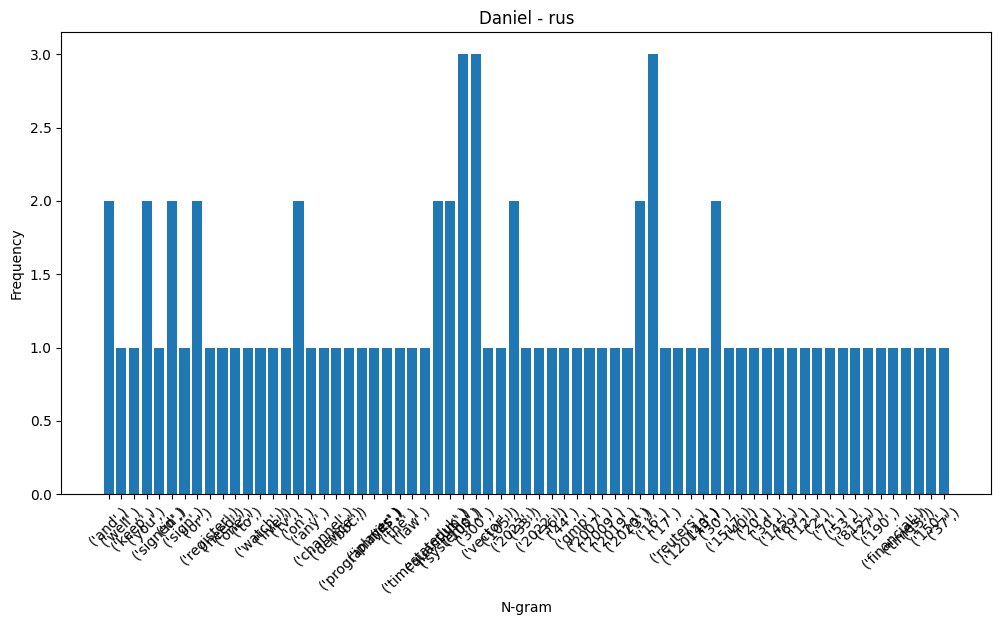

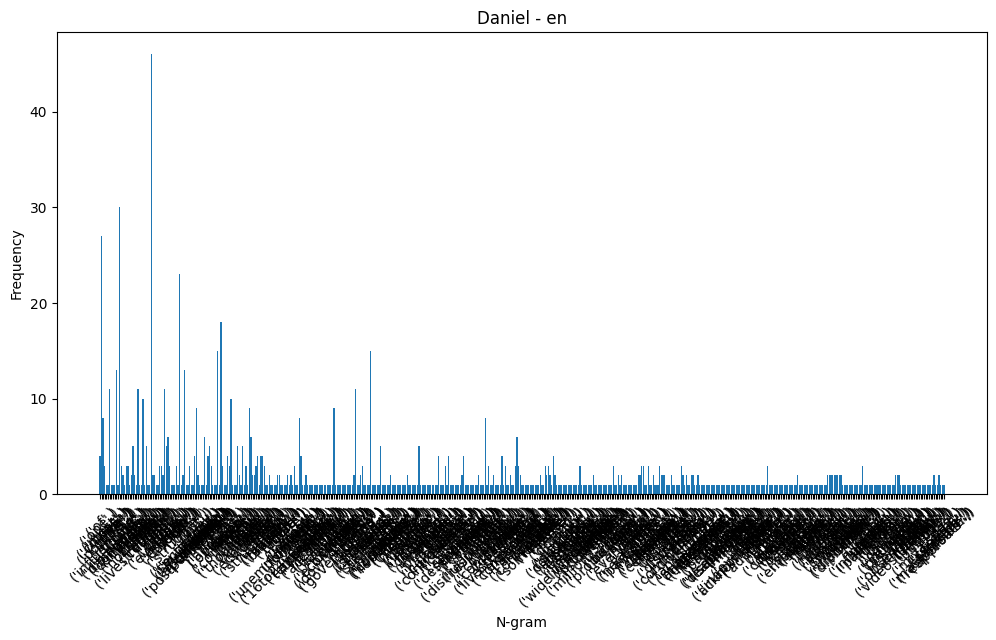

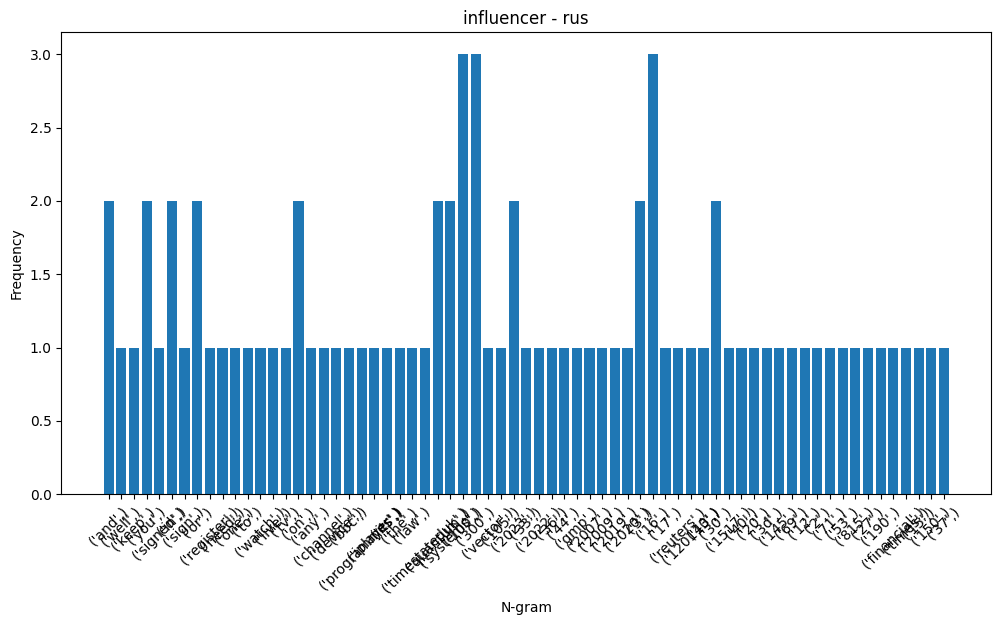

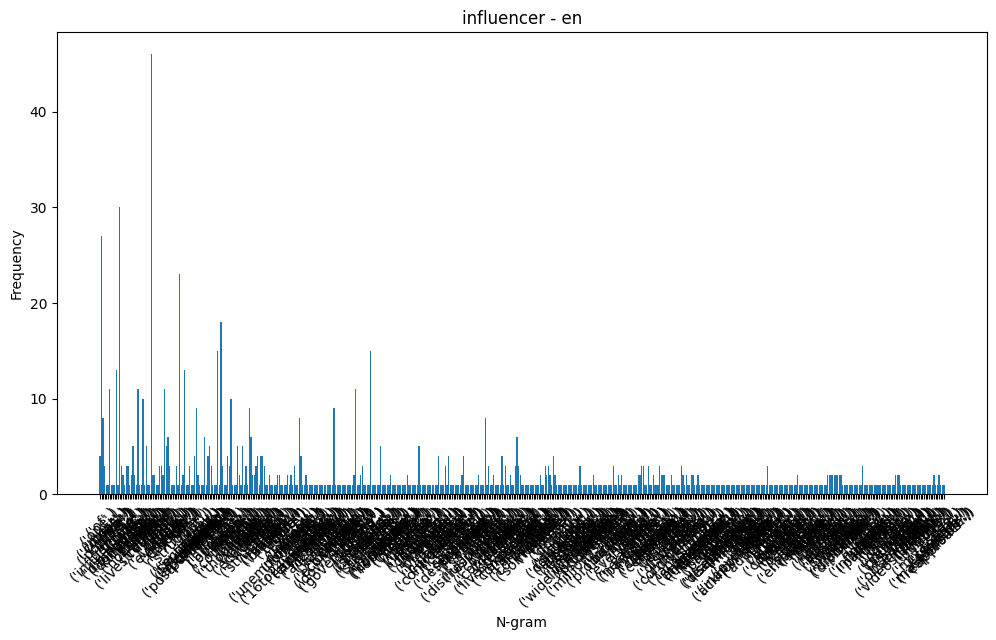

In [41]:
#unigram
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
import re

# Function to preprocess text by removing special characters and converting to lowercase
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

def plothistogram(ngram_counts, title):
    # Get the ngrams and their frequencies
    ngrams, frequencies = zip(*ngram_counts.items())

    # Convert ngrams to strings
    ngrams = [str(ngram) for ngram in ngrams]

    # Create a bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(ngrams, frequencies)
    plt.title(title)
    plt.xlabel('N-gram')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Specify the topics and languages
topics = ['Daniel', 'influencer']
languages = ['rus', 'en']

# Get news articles for the specified topics and languages
news_data = {}
for topic in topics:
    news_data[topic] = get_news_articles(topic, languages)

# Analyze unigrams for the fetched news articles
for topic, articles in news_data.items():
    for language, article_text in articles.items():
        # Preprocess the article text
        preprocessed_text = preprocess_text(article_text)

        # Analyze unigrams
        unigrams = Counter(ngrams(preprocessed_text.split(), 1))

        # Plot the histogram
        title = f'{topic} - {language}'
        plothistogram(unigrams, title)


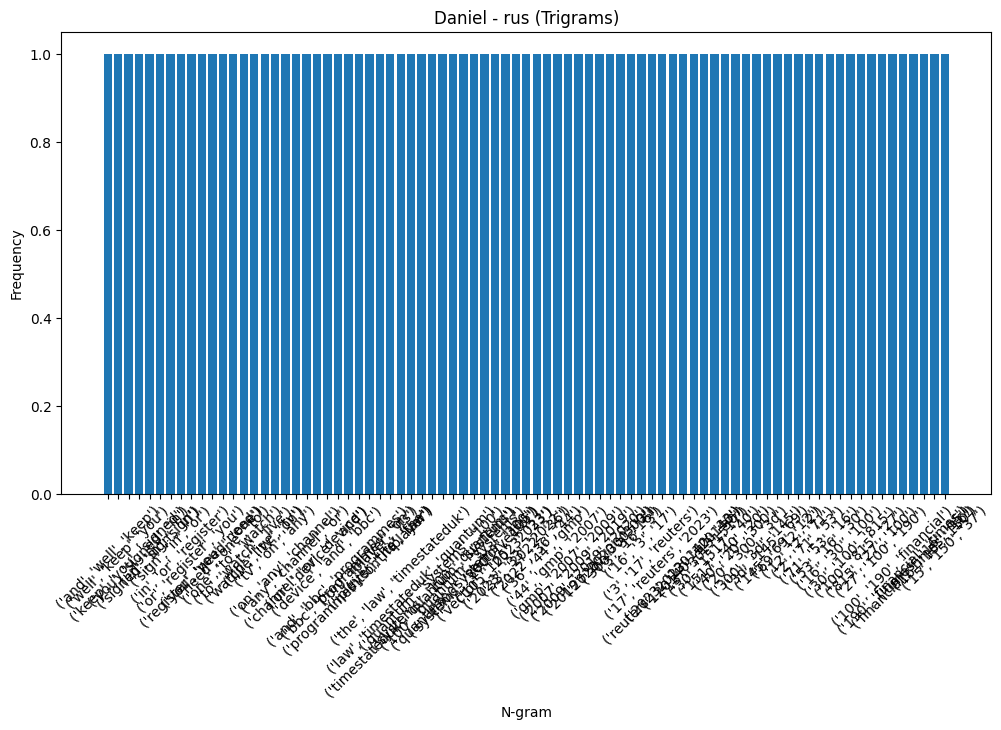

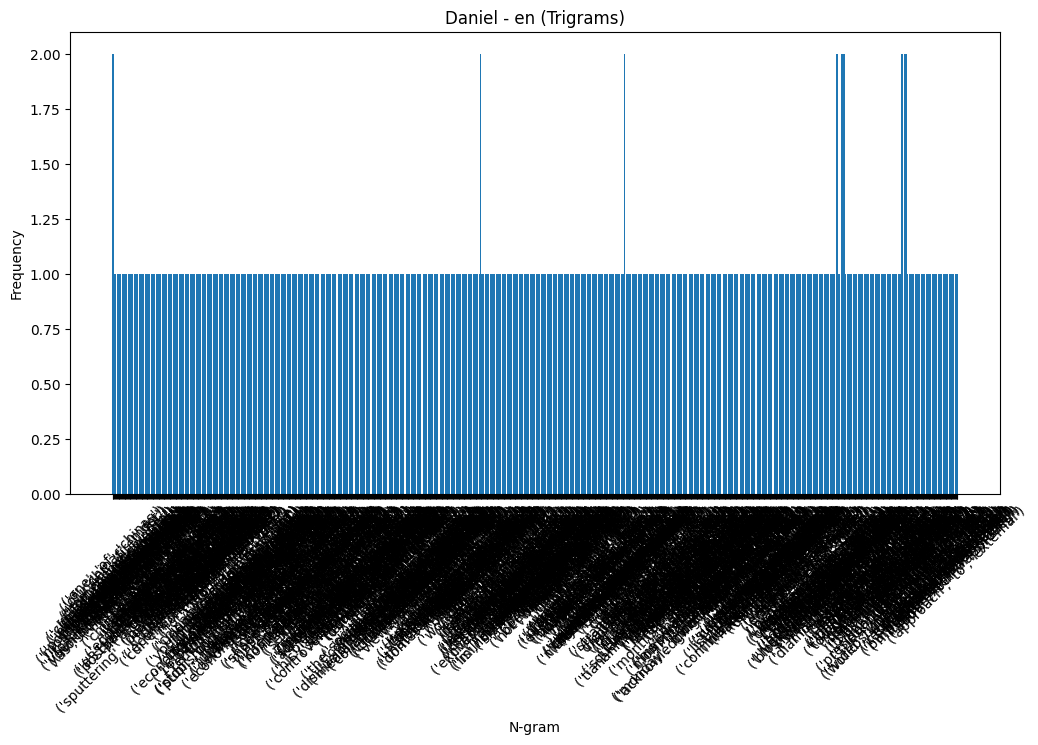

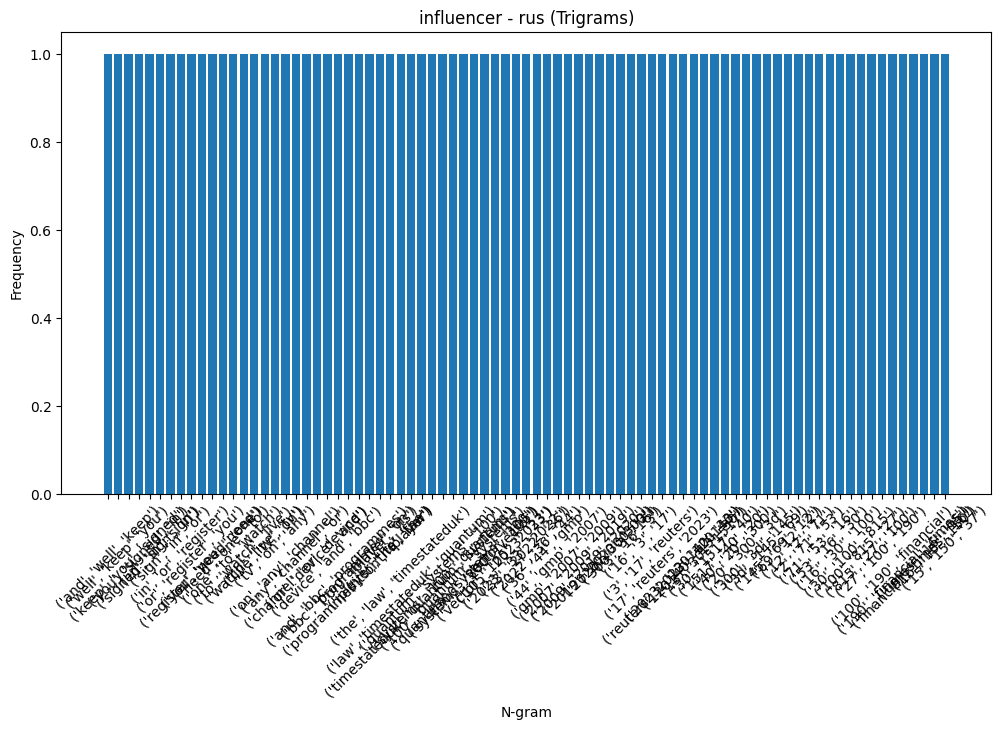

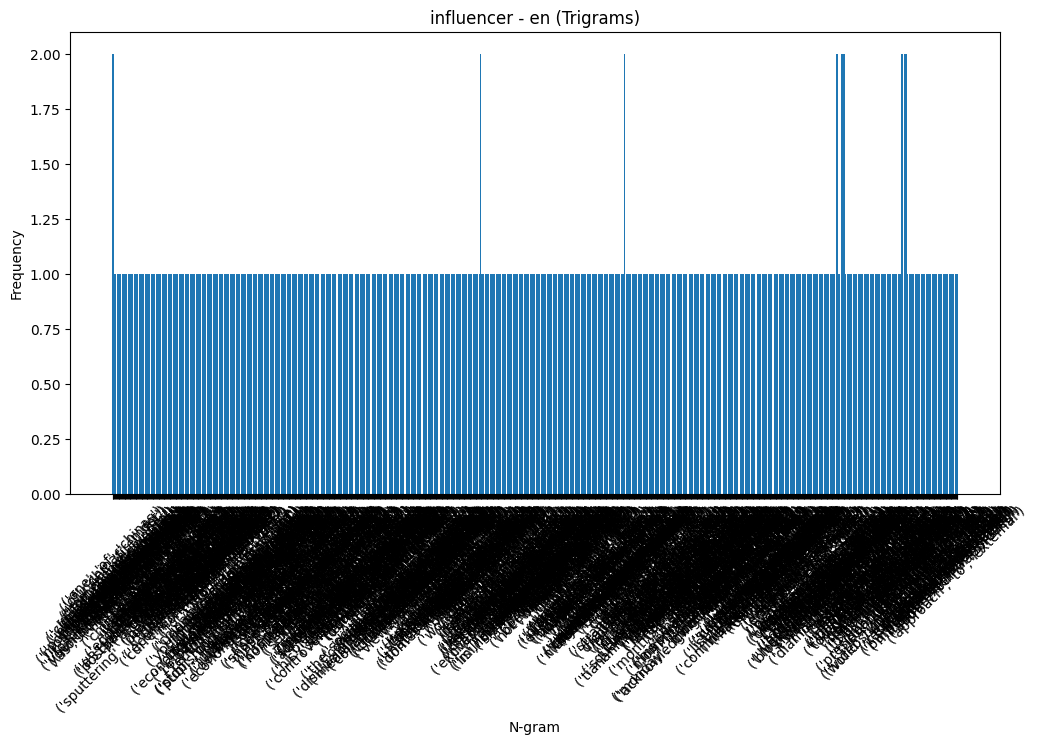

In [42]:
#trigram
# Analyze trigrams for the fetched news articles
for topic, articles in news_data.items():
    for language, article_text in articles.items():
        # Preprocess the article text
        preprocessed_text = preprocess_text(article_text)

        # Analyze trigrams
        trigrams = Counter(ngrams(preprocessed_text.split(), 3))  # 3 for trigrams

        # Plot the histogram
        title = f'{topic} - {language} (Trigrams)'
        plothistogram(trigrams, title)


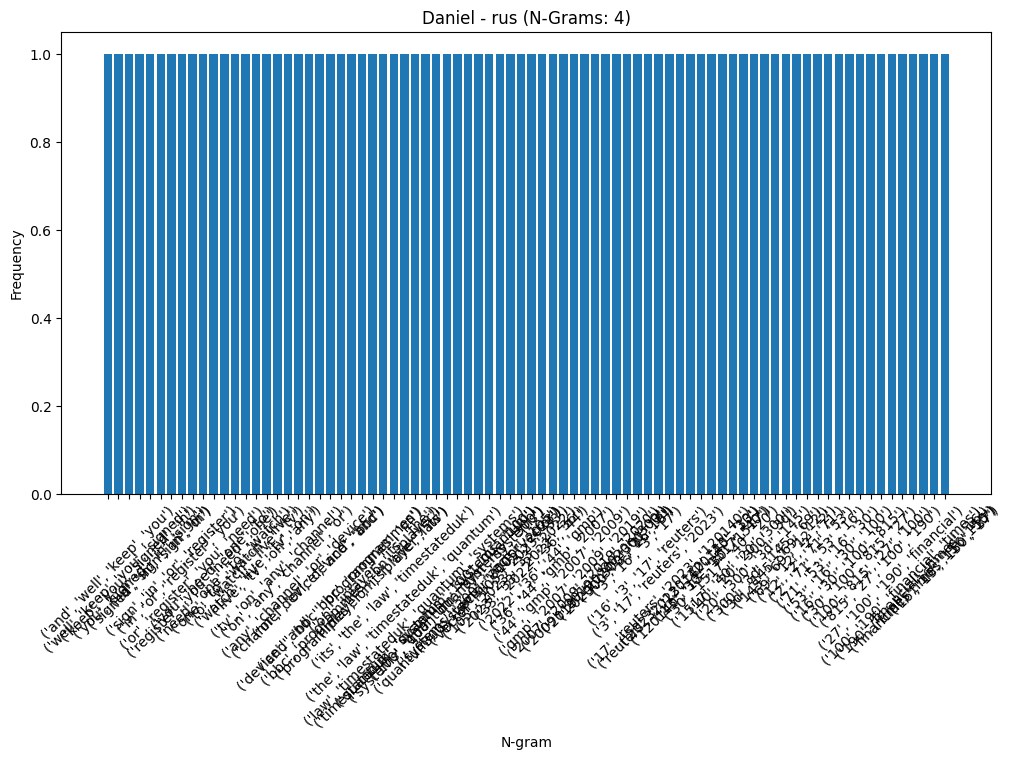

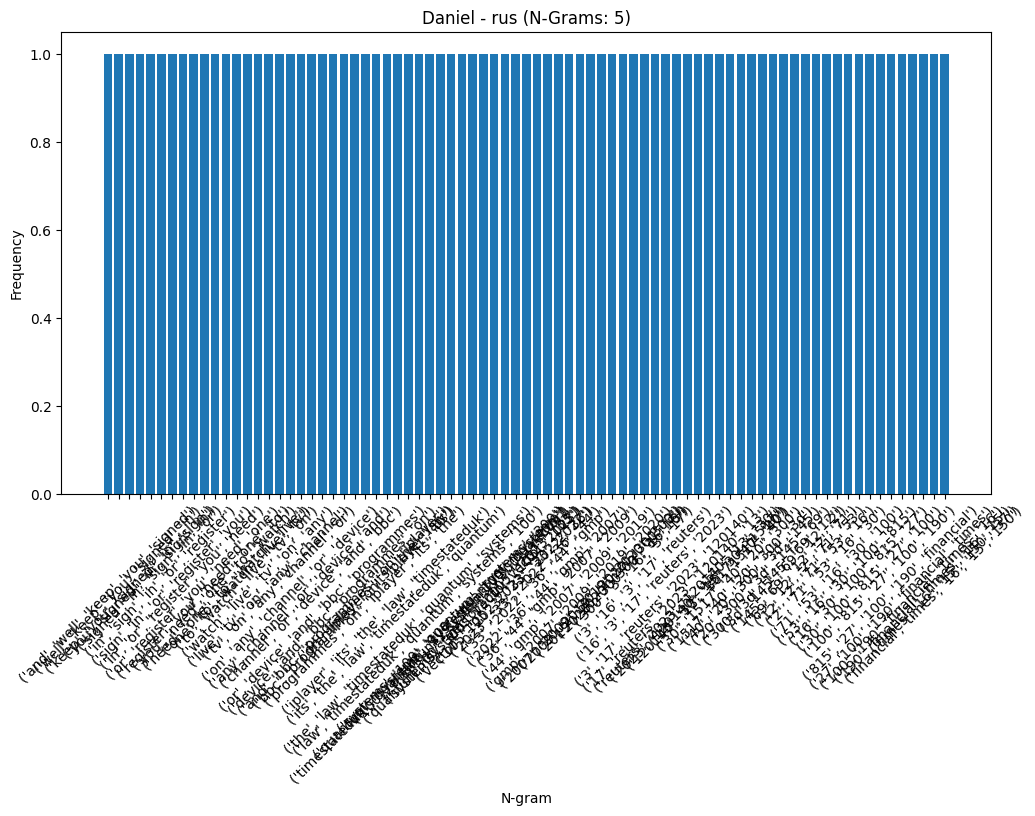

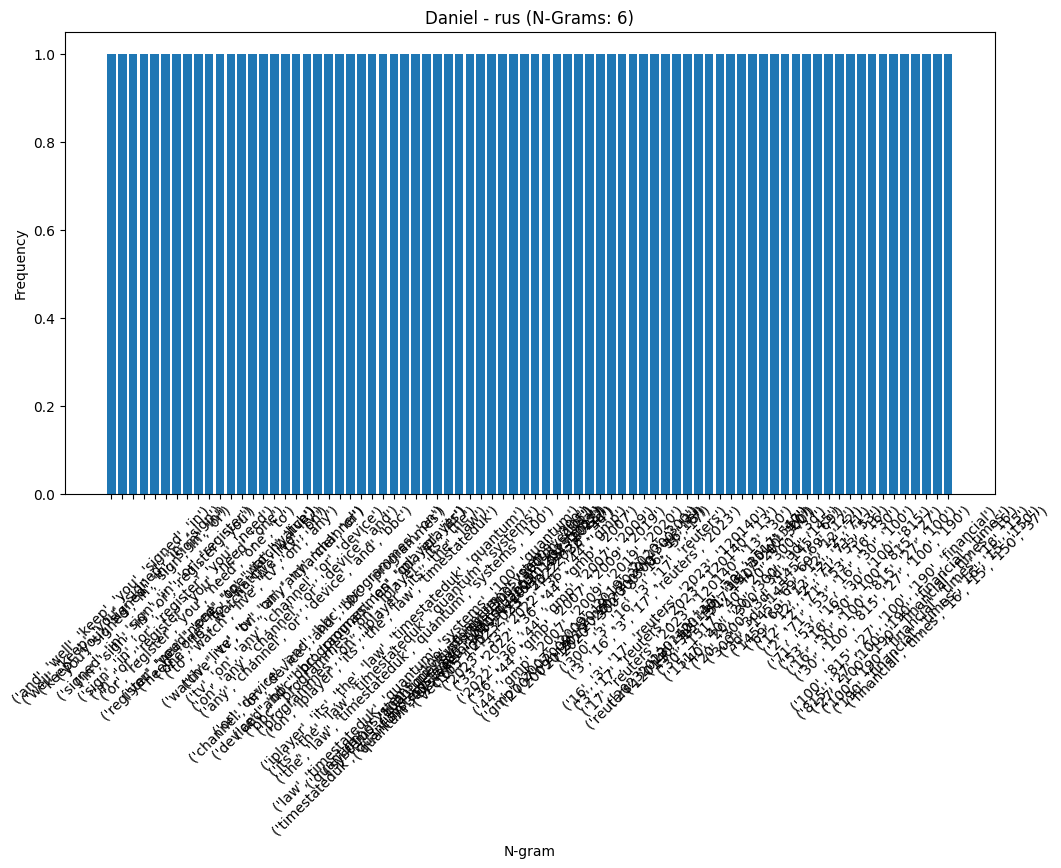

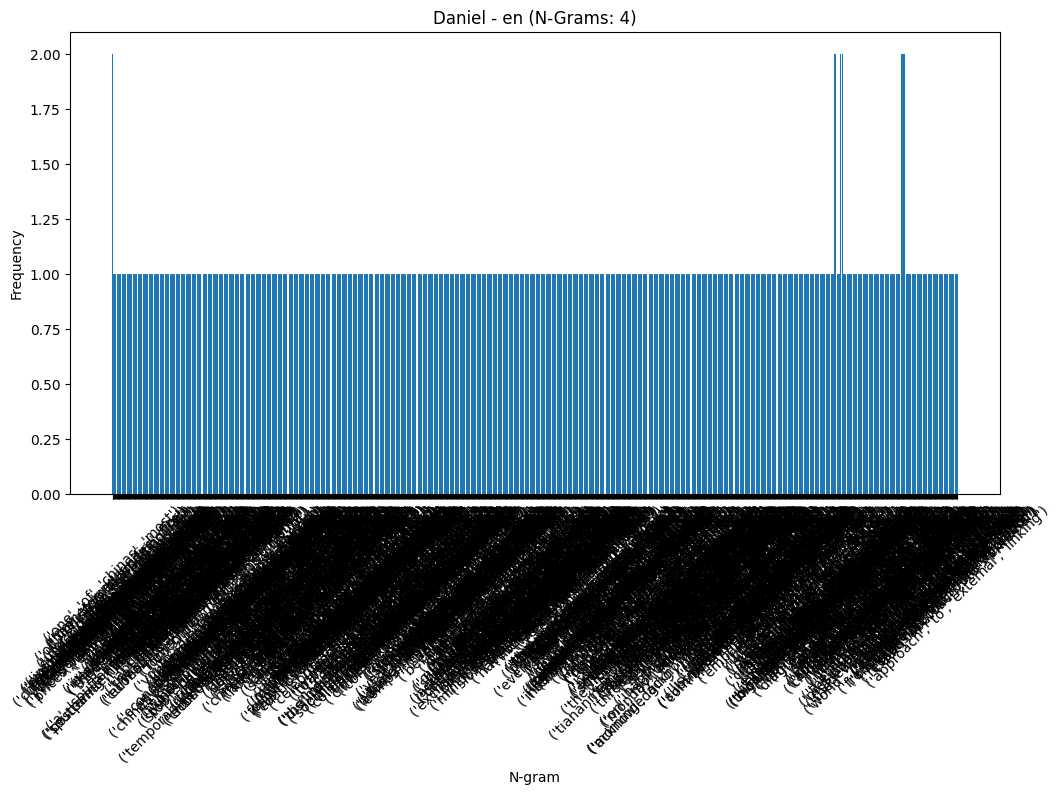

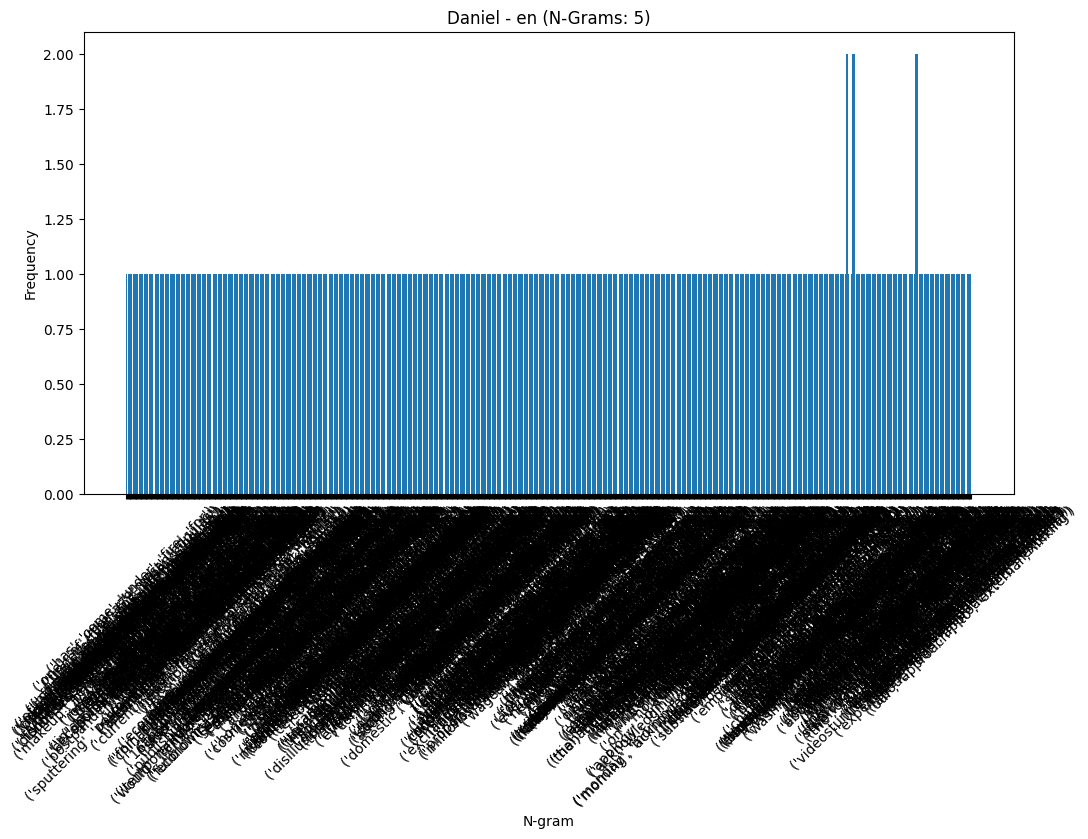

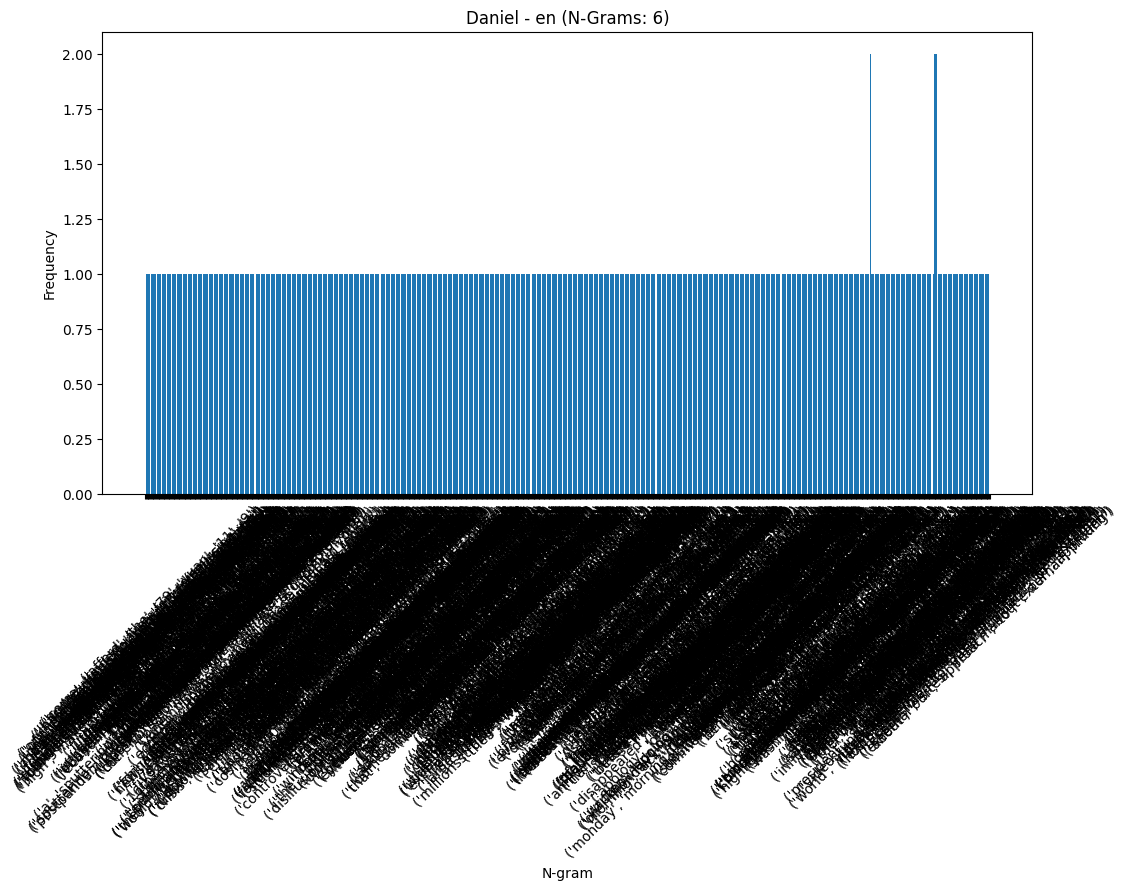

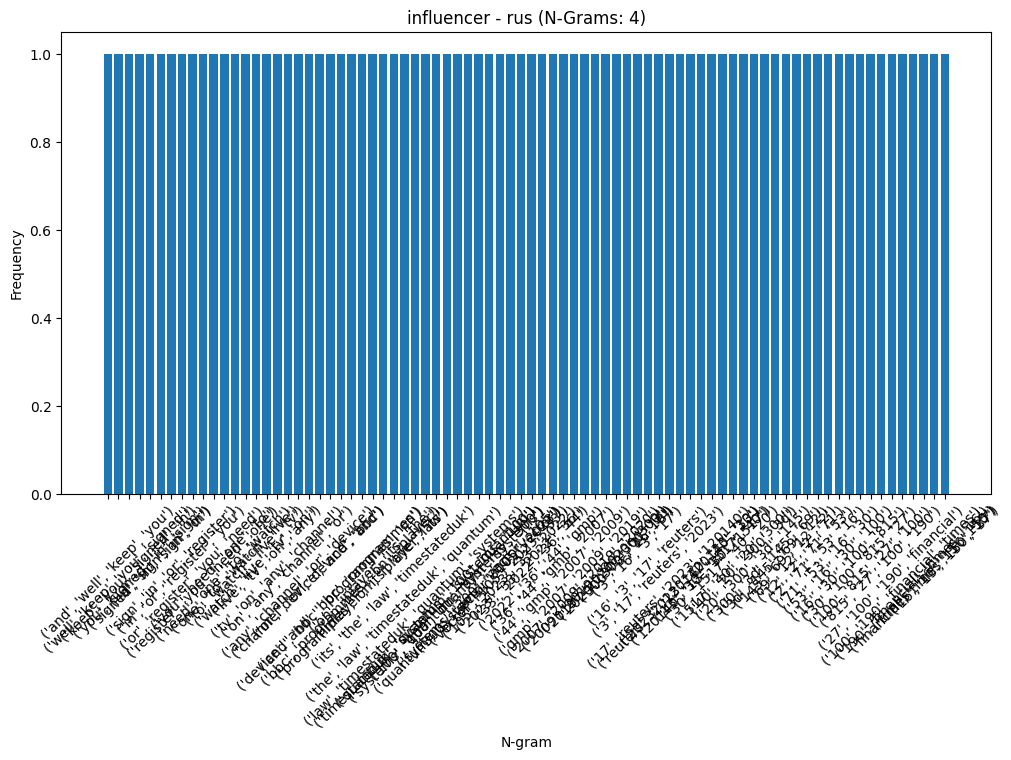

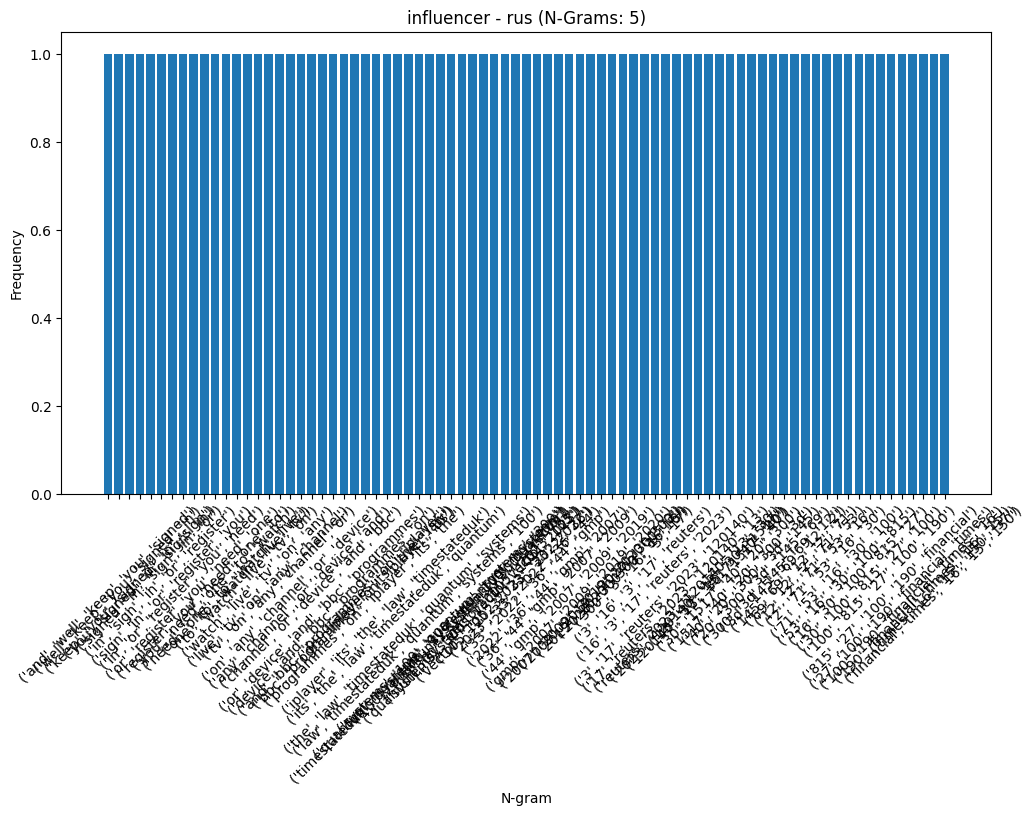

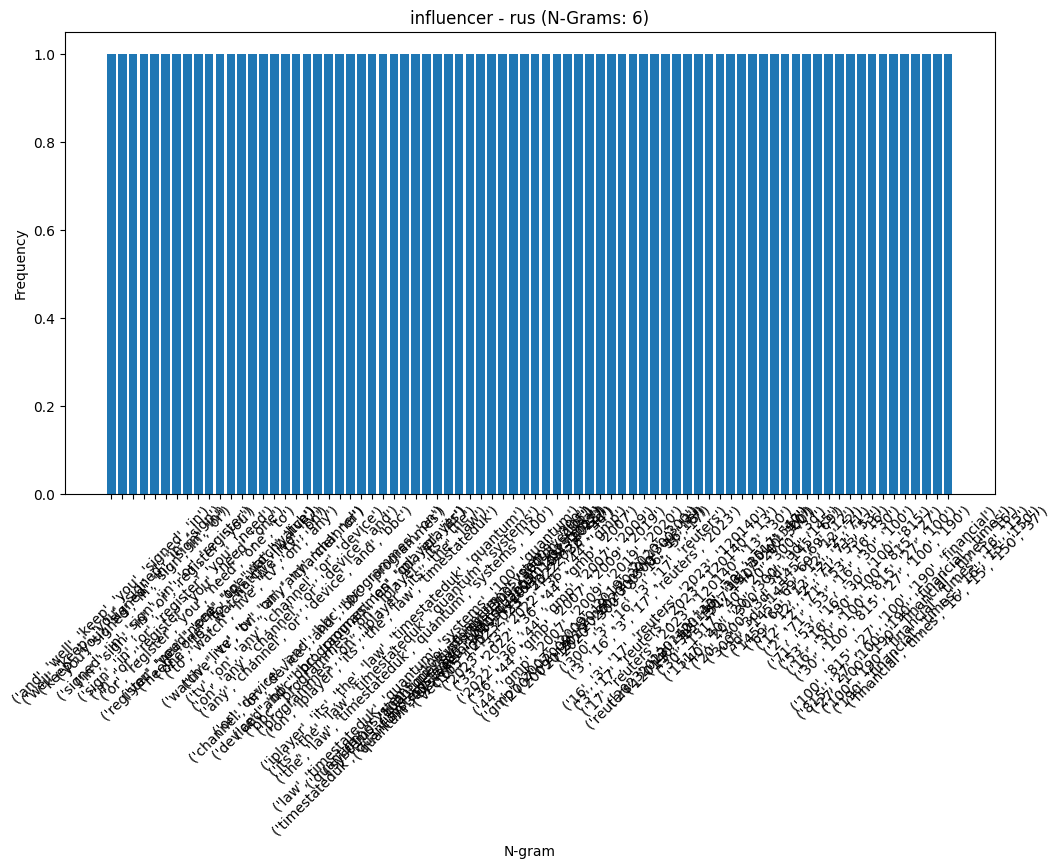

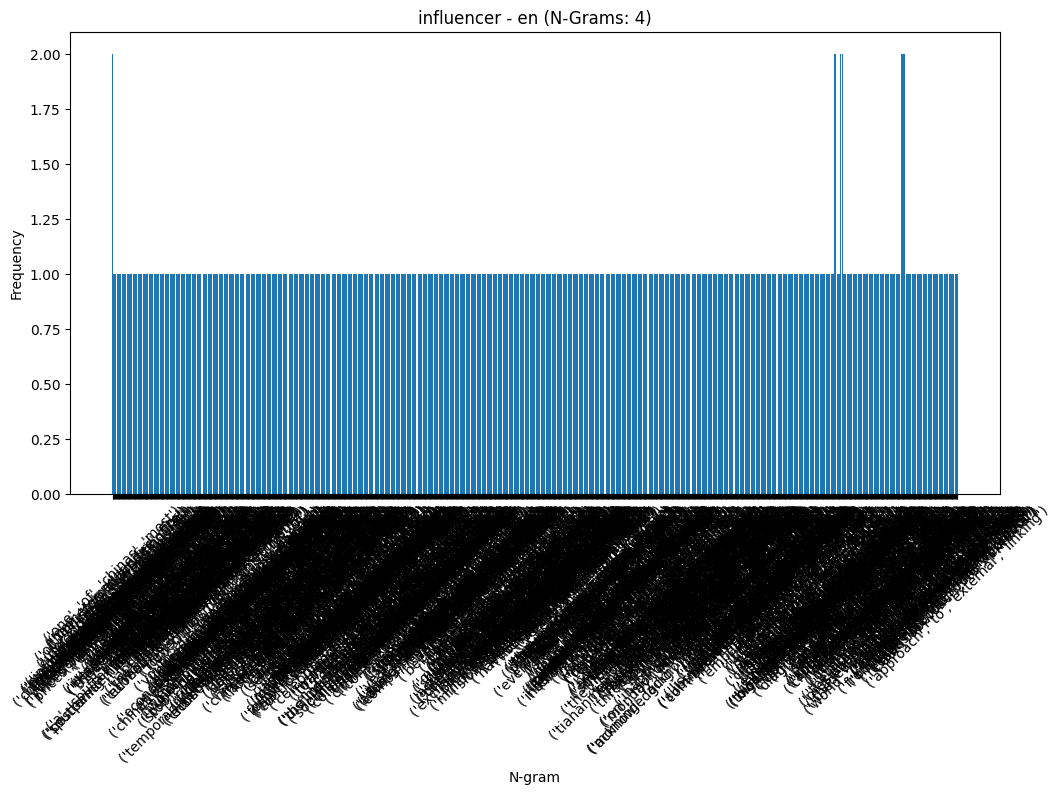

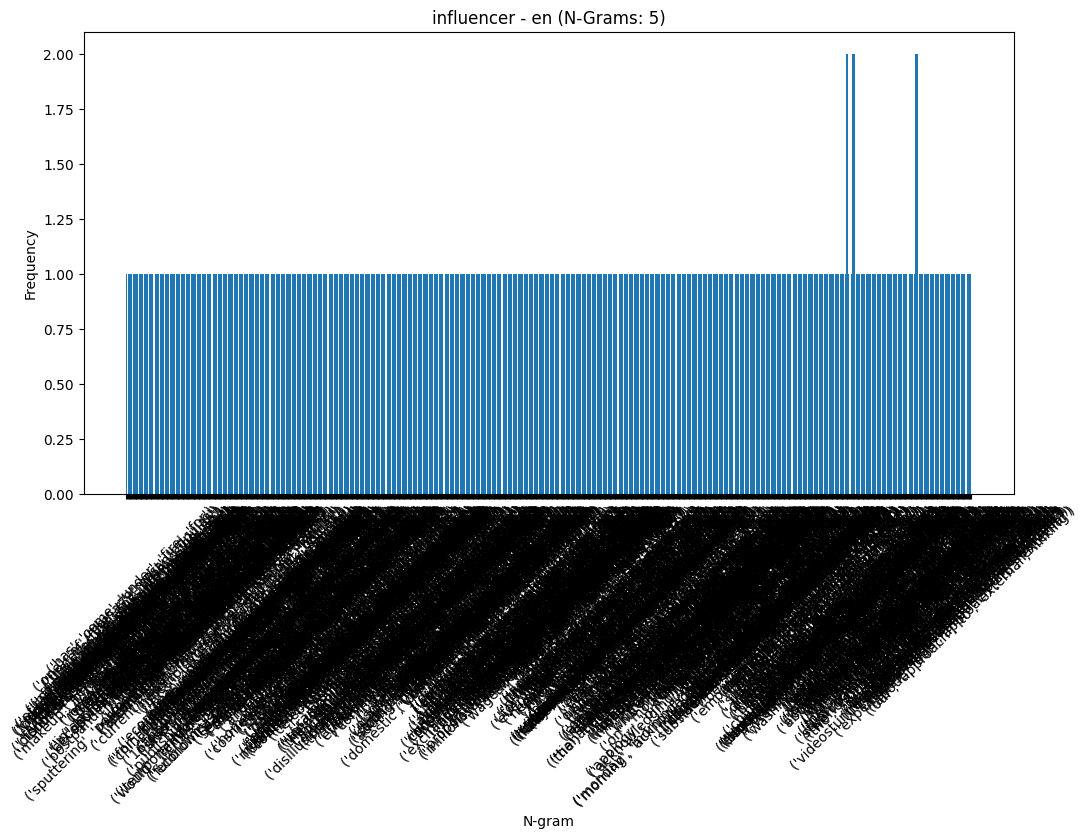

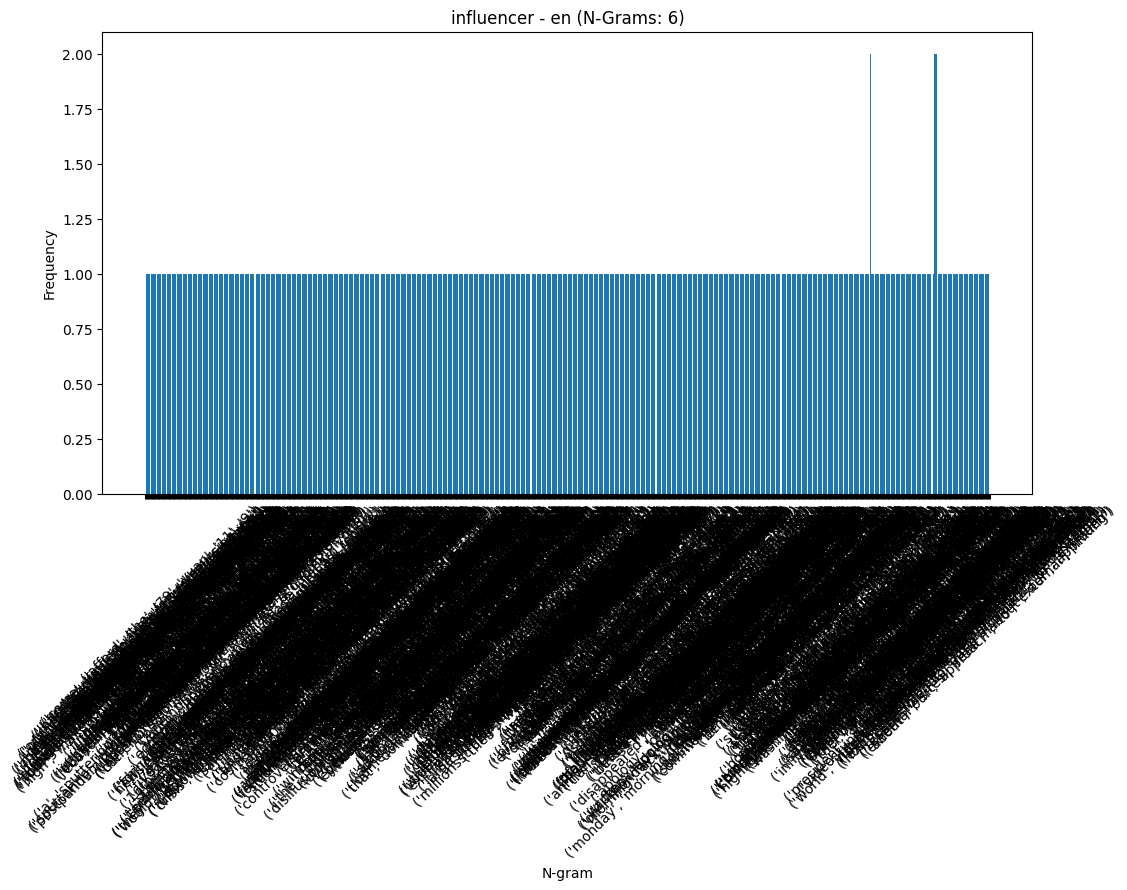

In [44]:
# Specify the desired n-gram lengths
ngram_lengths = [4,5,6]  # You can add more lengths as needed

# Analyze n-grams for the fetched news articles
for topic, articles in news_data.items():
    for language, article_text in articles.items():
        # Preprocess the article text
        preprocessed_text = preprocess_text(article_text)

        # Analyze n-grams for different lengths
        for n in ngram_lengths:
            ngrams_result = Counter(ngrams(preprocessed_text.split(), n))

            # Plot the histogram
            title = f'{topic} - {language} (N-Grams: {n})'
            plothistogram(ngrams_result, title)


# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [17]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [18]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

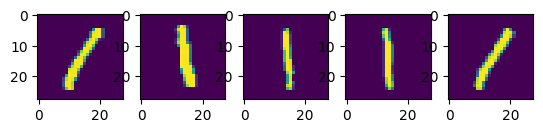

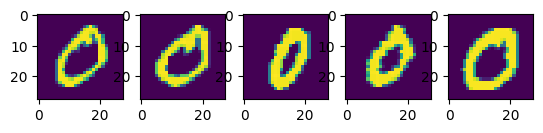

In [19]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

Now, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [20]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

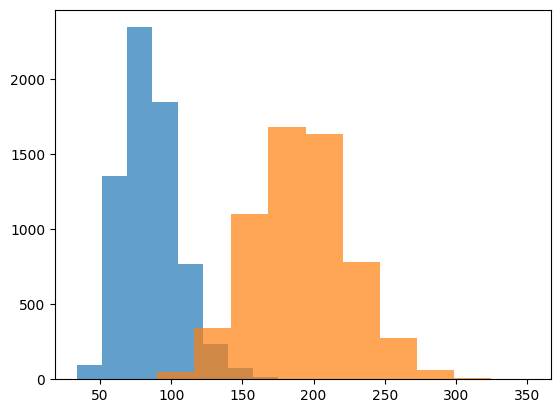

In [21]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [22]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

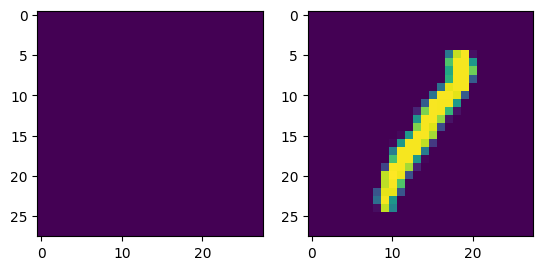

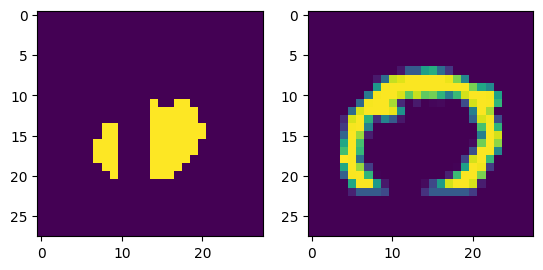

In [23]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

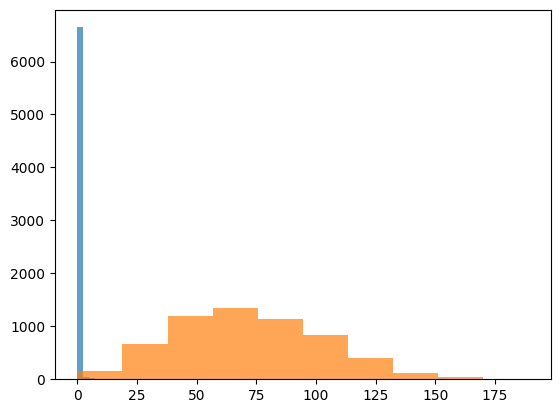

In [24]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [25]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

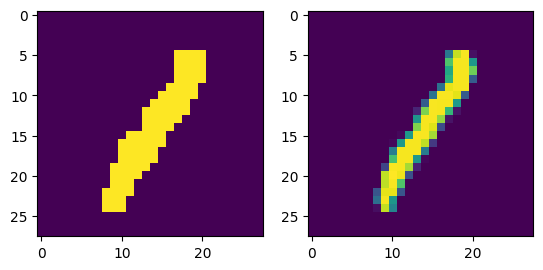

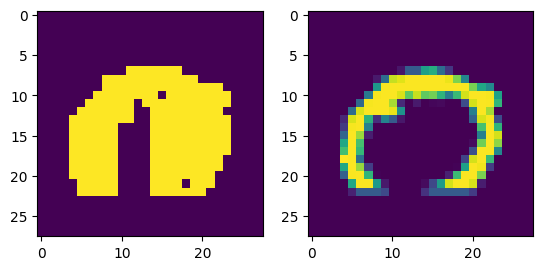

In [26]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

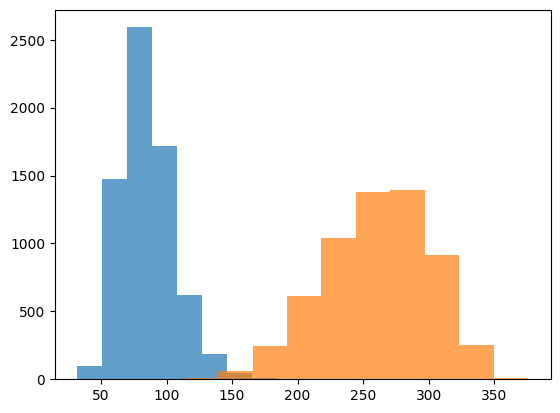

In [27]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [28]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

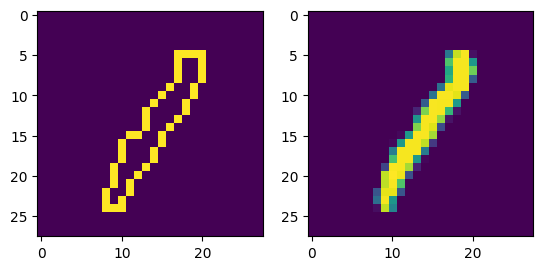

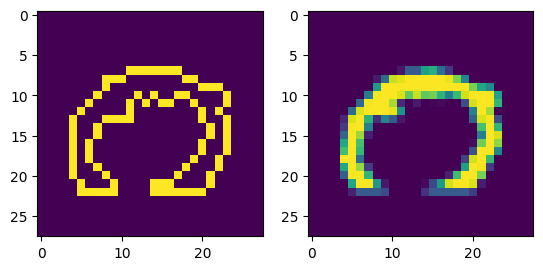

In [29]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

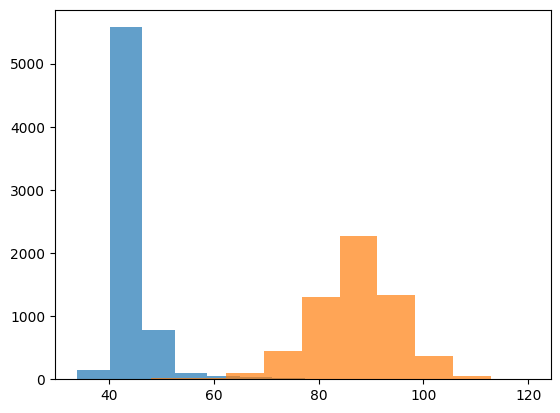

In [30]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

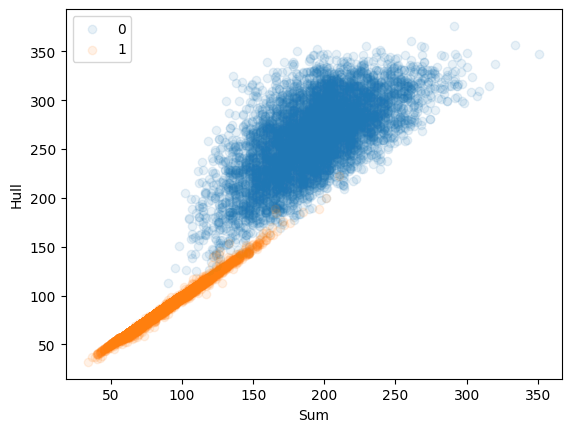

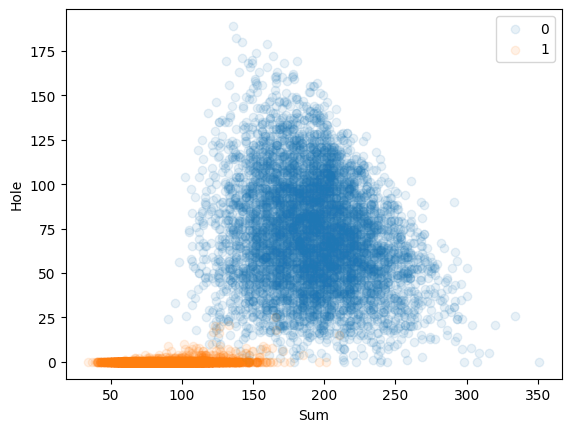

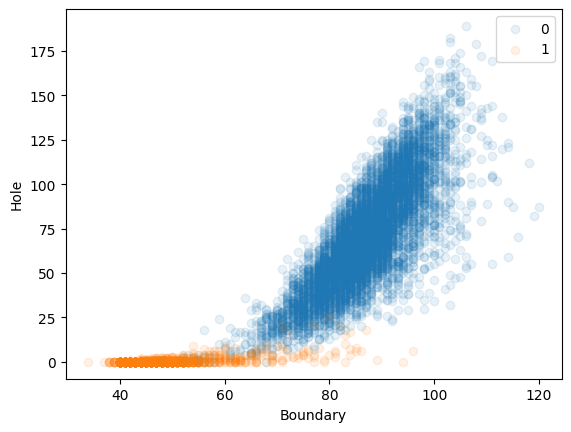

In [31]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [32]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

ANSWERS:

1.All the features mentioned above have their own uniqueness. But however as we can see even though individually features were able to distiguish those images there was still something left. Like if you look for bigger perspective then you will be able to notice how right and accurate it is to use the last one where we combined all the features. Even though it might be hard to understand for leyman but if you want a good model we should go with combination of 3 features i.e last one.

---------------------------------------------------------------------------

2.The choice of visualization technique will depend on the nature of your data and your specific goals, whether it's understanding data distribution, exploring feature relationships, or evaluating model performance.

a.Pairwise Scatterplots

b.Dimensionality Reduction

c.3D Plots

d.Pairwise Feature Correlation Matrix

e.Parallel Coordinates Plot

f.Feature Importance

g.Partial Dependency Plots

h.3D Decision Boundary

i.Interactive Visualization Tools

j.Cluster Analysis

---------------------------------------------------------------------------
3.The use of features more or less revolves around pixels and RGB values in case of images and that sort of gives an accurate result too. But if we further want to extend it we can use Texture Feature.
Texture Features: Texture features describe the spatial arrangement of pixels in an image. Common texture features include texture energy, entropy, contrast, and homogeneity. These features can be calculated using methods like Local Binary Patterns (LBP) or Gray-Level Co-occurrence Matrix (GLCM).

___________________________________________________________________________

4.These features will work for other classes too(or say most of the classes). This is because when it comes to images we mainly deal with pixels and that sort of produces the best result too. So with addition of additional features by laying on the foundation of pixels we can extend it to other images too.

---------------------------------------------------------------------------

5.If we take more than two classes at a time then the method we have used for above examples might not give an accurate result. As mentioned before if we want to extend it to further classes we need lay a building on this foundation of pixels registration and thats where other methods comes into play. More the number of classes more complex the model becomes and more inputs it needs.

